### Keras API Task

In [1]:
from tensorflow.keras.datasets import mnist

mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [2]:
# 데이터 확인

(train_images, train_targets), (test_images, test_targets) = mnist.load_data()

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


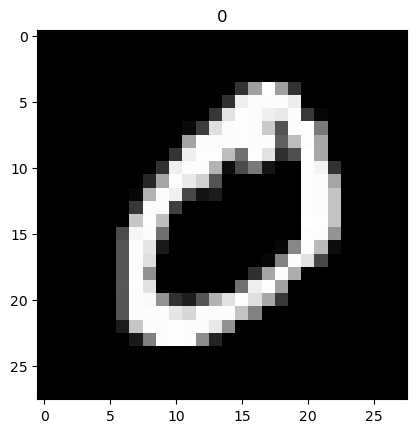

In [3]:
import matplotlib.pyplot as plt

plt.imshow(train_images[1], cmap='gray')
plt.title(train_targets[1])
plt.show()

In [4]:
# 데이터 전처리 (색상으로 값을 보정하기 위한 변경)
import numpy as np

def get_preporcessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float64)
    targets = np.array(targets, dtype=np.float64)

    return images, targets

train_images, train_targets = get_preporcessed_data(train_images, train_targets)
test_images, test_targets = get_preporcessed_data(test_images, test_targets)

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE,INPUT_SIZE)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# 경사하강법 optimizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [7]:
# 원-핫 인코딩
from tensorflow.keras.utils import to_categorical

train_oh_targets = to_categorical(train_targets)
test_oh_targets = to_categorical(test_targets)

print(train_oh_targets.shape)
print(test_oh_targets.shape)

(60000, 10)
(10000, 10)


In [8]:
history = model.fit(
            x=train_images,
            y=train_oh_targets,
            batch_size=64, 
            epochs=20
)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - accuracy: 0.8451 - loss: 0.5438
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 579us/step - accuracy: 0.9589 - loss: 0.1406
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 588us/step - accuracy: 0.9714 - loss: 0.0955
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 632us/step - accuracy: 0.9761 - loss: 0.0745
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 579us/step - accuracy: 0.9818 - loss: 0.0572
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step - accuracy: 0.9848 - loss: 0.0485
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - accuracy: 0.9876 - loss: 0.0385
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 585us/step - accuracy: 0.9899 - loss: 0.0326
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 581us/step - accuracy: 0.9908 - loss: 0.0295
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step - accuracy: 0.9921 - loss: 0.0261
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - accuracy: 0.9936 - loss: 0.0201
Epoch 12/20
938/938 ━━━━━━━━━━

In [9]:
print(history.history['loss'])
print('=' * 80)
history.history['accuracy']

[0.3031312823295593, 0.13097788393497467, 0.09362271428108215, 0.07452986389398575, 0.06149032339453697, 0.050255436450242996, 0.042172789573669434, 0.03615017607808113, 0.03182920441031456, 0.026963770389556885, 0.022675223648548126, 0.023676617071032524, 0.018125398084521294, 0.016144422814249992, 0.017379678785800934, 0.012702297419309616, 0.014170905575156212, 0.012244483456015587, 0.010020168498158455, 0.013110318221151829]


[0.9121999740600586,
 0.9611999988555908,
 0.9719666838645935,
 0.9761999845504761,
 0.9802333116531372,
 0.984000027179718,
 0.9862333536148071,
 0.9883333444595337,
 0.9894166588783264,
 0.991516649723053,
 0.9926166534423828,
 0.9923166632652283,
 0.9940666556358337,
 0.9948999881744385,
 0.9942666888237,
 0.9957500100135803,
 0.995116651058197,
 0.9960333108901978,
 0.9967166781425476,
 0.9957500100135803]

In [10]:
# 훈련과 정답의 차원을 맞추기 위해 차원을 늘리는 작업
import numpy as np
np.expand_dims(test_images[0], axis=0).shape

(1, 28, 28)

In [11]:
# pred_prob = model.predict(np.expand_dims(test_images[10], axis=0))
# print(pred_prob)

In [12]:
import matplotlib.pyplot as plt

def show_images(images, targets, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i], cmap='gray')
        # axs[i].set_title(class_names[targets[i]])

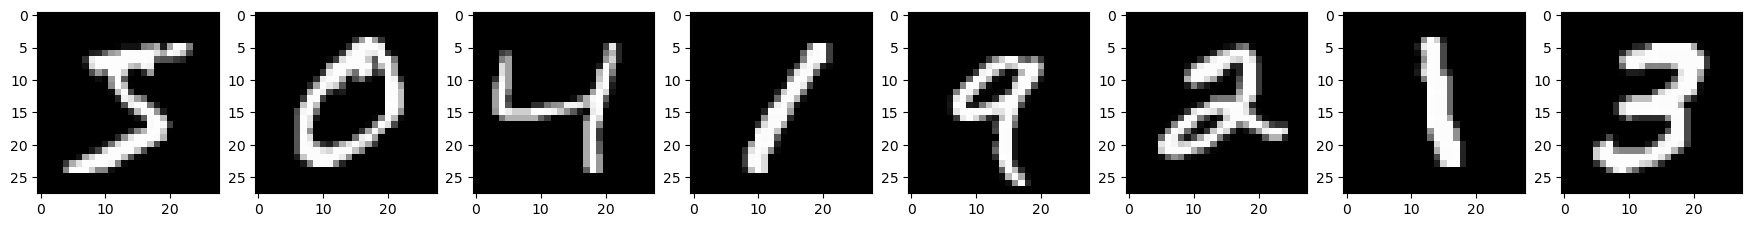

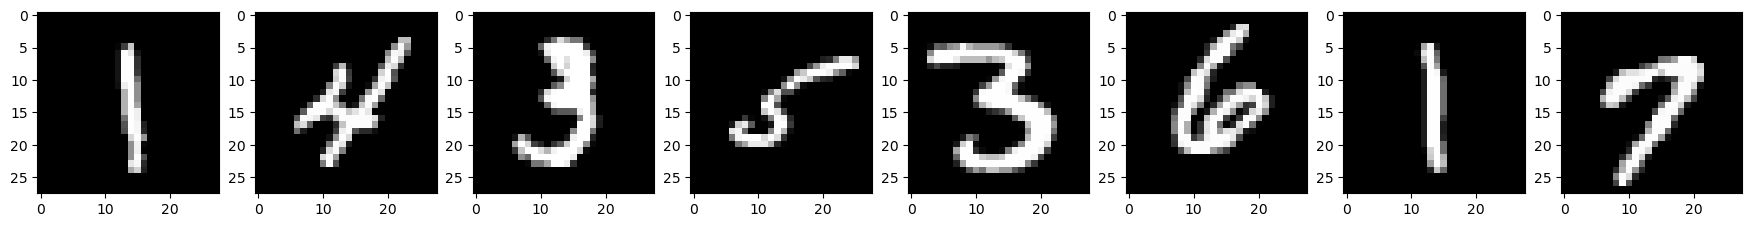

In [13]:
show_images(train_images[:8], train_targets[:8])
show_images(train_images[8:16], train_targets[8:16])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[6.0756997e-07 6.7213772e-09 8.1308305e-10 1.0224046e-11 2.1879296e-09
  1.2008988e-08 9.9999940e-01 1.1312130e-11 9.1079100e-09 3.8996213e-11]]


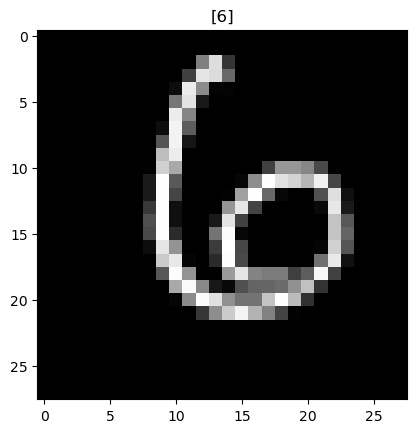

In [14]:
import matplotlib.pyplot as plt

pred_prob = model.predict(np.expand_dims(test_images[100], axis=0))
print(pred_prob)

plt.imshow(test_images[100], cmap='gray')
plt.title([pred_prob.flatten().argsort()[::-1][0]])
plt.show()

validation

In [15]:
from sklearn.model_selection import train_test_split

train_images, validation_images, train_targets, validation_targets = \
train_test_split(train_images, train_targets, stratify=train_targets, test_size=0.2, random_state=124)

train_oh_targets = to_categorical(train_targets)
validation_oh_targets = to_categorical(validation_targets)

print(train_oh_targets.shape)
print(validation_oh_targets.shape)

(48000, 10)
(12000, 10)


In [16]:
history = model.fit(x=train_images,
                    y=train_oh_targets,
                    validation_data=(validation_images, validation_oh_targets),
                    batch_size=32,
                    epochs=20,
                    verbose=2
)

Epoch 1/20
1500/1500 - 1s - 645us/step - accuracy: 0.9911 - loss: 0.0264 - val_accuracy: 0.9932 - val_loss: 0.0209
Epoch 2/20
1500/1500 - 1s - 593us/step - accuracy: 0.9934 - loss: 0.0189 - val_accuracy: 0.9845 - val_loss: 0.0483
Epoch 3/20
1500/1500 - 1s - 591us/step - accuracy: 0.9948 - loss: 0.0162 - val_accuracy: 0.9905 - val_loss: 0.0305
Epoch 4/20
1500/1500 - 1s - 592us/step - accuracy: 0.9941 - loss: 0.0178 - val_accuracy: 0.9917 - val_loss: 0.0290
Epoch 5/20
1500/1500 - 1s - 584us/step - accuracy: 0.9947 - loss: 0.0155 - val_accuracy: 0.9876 - val_loss: 0.0518
Epoch 6/20
1500/1500 - 1s - 589us/step - accuracy: 0.9957 - loss: 0.0139 - val_accuracy: 0.9893 - val_loss: 0.0375
Epoch 7/20
1500/1500 - 1s - 592us/step - accuracy: 0.9956 - loss: 0.0130 - val_accuracy: 0.9890 - val_loss: 0.0384
Epoch 8/20
1500/1500 - 1s - 587us/step - accuracy: 0.9962 - loss: 0.0111 - val_accuracy: 0.9871 - val_loss: 0.0502
Epoch 9/20
1500/1500 - 1s - 591us/step - accuracy: 0.9952 - loss: 0.0142 - val_a

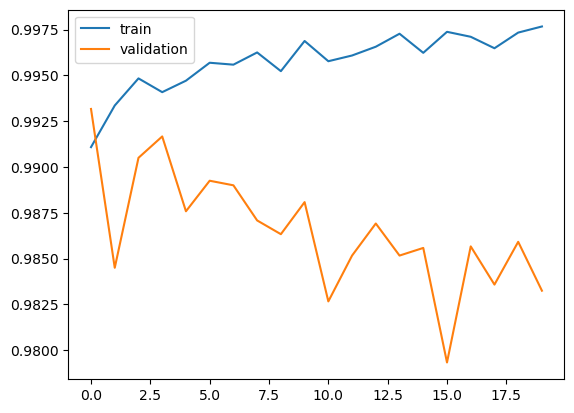

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

funtional

In [18]:
# 모델 생성
from tensorflow.keras.layers import Dense, Flatten, Layer, Input
from tensorflow.keras.models import Model

INPUT_SIZE = 28

def create_model():
    input_tensor = Input((INPUT_SIZE, INPUT_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(64, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    output = Dense(10, activation = 'softmax')(x)

    model = Model(inputs=input_tensor, outputs=output)

    return model


In [19]:
# 전처리

(train_images, train_targets), (test_images, test_targets) = mnist.load_data()

# 255 색상 minmax scale
def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype = np.float32)
    targets = np.array(targets, dtype = np.float32)

    return images, targets

# 원핫 인코딩
def get_preprocessed_ohe(images, targets):
    images, targets = get_preporcessed_data(images, targets)
    oh_targets = to_categorical(targets)

    return images, oh_targets

def get_train_valid_test(train_images, train_targets, test_images, test_targets, validation_size=0.2, random_state=124):
    train_images, train_oh_targets= get_preprocessed_ohe(train_images, train_targets)
    test_images, test_oh_targets = get_preprocessed_ohe(test_images, test_targets)

    train_images, validation_images, train_oh_targets, validation_oh_targets =\
    train_test_split(train_images, train_oh_targets, stratify=train_oh_targets, test_size=validation_size, random_state=random_state)

    return (train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets)
    

In [20]:
(train_images, train_targets),(test_images, test_targets) = mnist.load_data()

(train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets) =\
get_train_valid_test(train_images, train_targets, test_images, test_targets)

print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)
print(test_images.shape, test_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)
(10000, 28, 28) (10000, 10)


In [21]:
model = create_model()
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

In [32]:
history = model.fit(
                x = train_images,
                y = train_oh_targets,
                validation_data = (validation_images, validation_oh_targets),
                batch_size = 64,
                epochs = 5,
                verbose = 2
)

Epoch 1/5
750/750 - 1s - 1ms/step - acc: 0.9950 - loss: 0.0146 - val_acc: 0.9733 - val_loss: 0.1408
Epoch 2/5
750/750 - 1s - 1ms/step - acc: 0.9952 - loss: 0.0148 - val_acc: 0.9753 - val_loss: 0.1190
Epoch 3/5
750/750 - 1s - 992us/step - acc: 0.9966 - loss: 0.0121 - val_acc: 0.9740 - val_loss: 0.1352
Epoch 4/5
750/750 - 1s - 997us/step - acc: 0.9970 - loss: 0.0092 - val_acc: 0.9722 - val_loss: 0.1493
Epoch 5/5
750/750 - 1s - 997us/step - acc: 0.9957 - loss: 0.0138 - val_acc: 0.9722 - val_loss: 0.1663


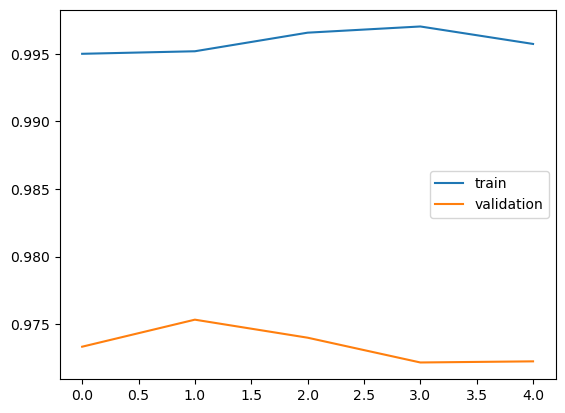

In [33]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[6.1482351e-13 3.3579917e-09 5.1472716e-06 9.9999440e-01 5.0728688e-09
  9.5556935e-08 1.2232900e-15 6.9160599e-10 3.4773731e-07 2.2788333e-08]]


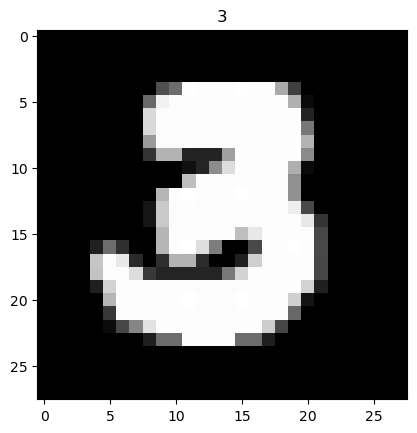

In [40]:
import matplotlib.pyplot as plt


pred_prob = model.predict(np.expand_dims(test_images[200], axis=0))
print(pred_prob)

plt.imshow(test_images[200], cmap='gray')
plt.title(pred_prob.flatten().argsort()[::-1][0])
plt.show()

In [26]:
def show_images(images, targets, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i], cmap='gray')
        # axs[i].set_title(class_names[targets[i]])

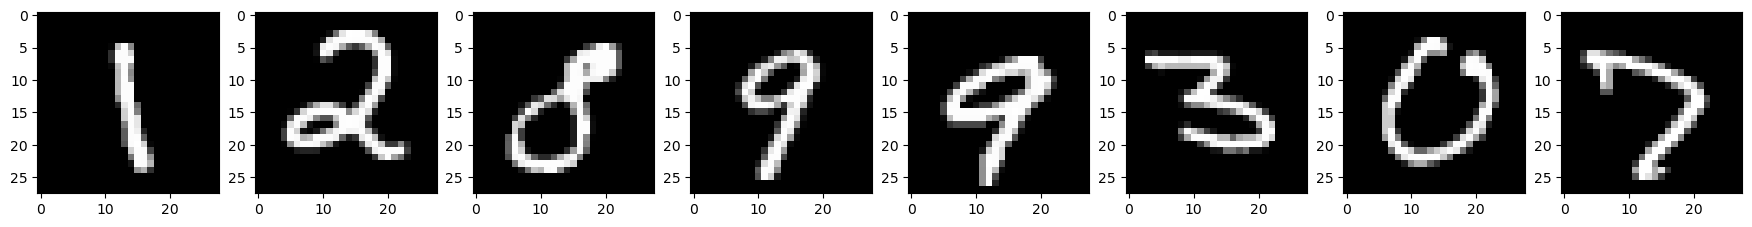

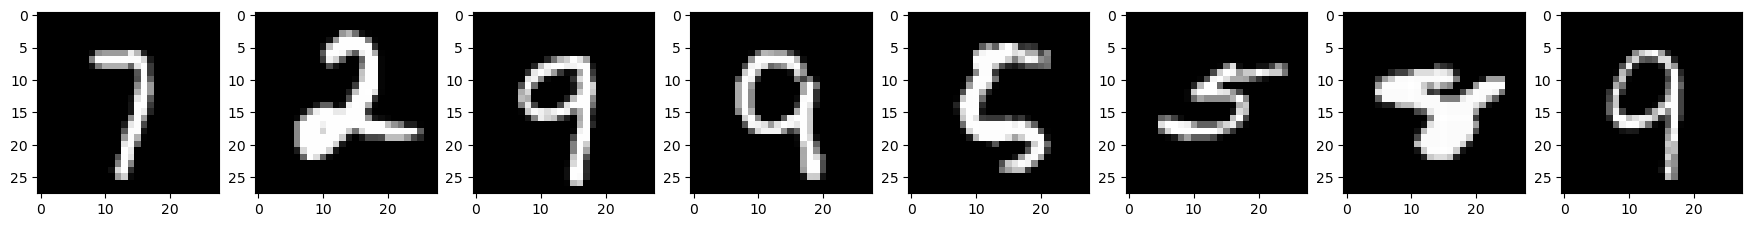

In [27]:
show_images(train_images[:8], train_targets[:8])
show_images(train_images[8:16], train_targets[8:16])

In [28]:
test_oh_targets[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])